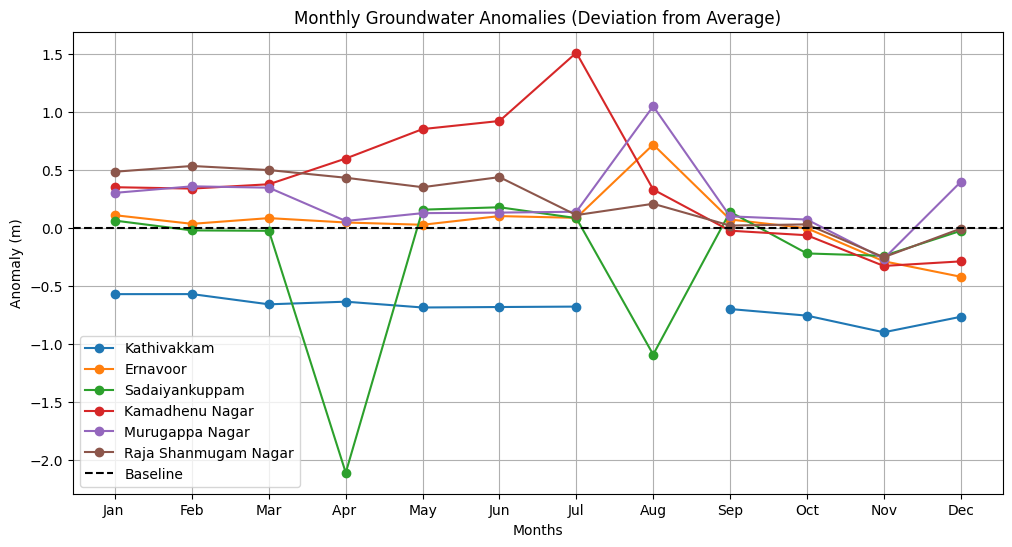


📌 Locations with High Positive Anomalies (Unusual Increase in Groundwater Levels):
     S.No. Area No.  Dept No.              Location      Jan        Feb  \
1      2.0        I         2           Kathivakkam  0.839875  0.850250   
2      3.0        I         3              Ernavoor  0.108750  0.034750   
4      5.0        I         5       Kamadhenu Nagar  0.349750  0.338000   
5      6.0        I         6       Murugappa Nagar  0.301500  0.357500   
6      7.0        I         7  Raja Shanmugam Nagar  0.483250  0.532500   
..     ...      ...       ...                   ...       ...       ...   
785  186.0      XIV       186             Perungudi  2.230750  3.335625   
787  188.0      XIV       188            Madipakkam  0.514750  0.609125   
789  190.0      XIV       190          Pallikarania  0.189750  0.530000   
791  192.0       XV       192           Neelankarai  0.382750  0.690500   
797  198.0       XV       198       Shozhinganallur  0.138000  0.420500   

          Mar  

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# File paths for 2021-2024
file_path_2021 = "../dataset/chennai-ground-water-levels-2021.csv"
file_path_2022 = "../dataset/chennai-ground-water-levels-2022.csv"
file_path_2023 = "../dataset/chennai-ground-water-levels-2023.csv"
file_path_2024 = "../dataset/chennai-ground-water-levels-2024.csv"

# Load datasets
df_2021 = pd.read_csv(file_path_2021)
df_2022 = pd.read_csv(file_path_2022)
df_2023 = pd.read_csv(file_path_2023)
df_2024 = pd.read_csv(file_path_2024)

# List of monthly columns
monthly_columns = ["Jan ", "Feb", "Mar", "Apr ", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Data Preparation: Ensure all datasets have necessary columns
def prepare_data(df, year=None):
    if year == 2024:
        df[monthly_columns[3:]] = np.nan  # Set Apr-Dec to NaN for 2024
    df[monthly_columns] = df[monthly_columns].apply(pd.to_numeric, errors='coerce')
    df["Yearly Average"] = df[monthly_columns].mean(axis=1)
    return df

# Apply preparation function
df_2021 = prepare_data(df_2021, 2021)
df_2022 = prepare_data(df_2022, 2022)
df_2023 = prepare_data(df_2023, 2023)
df_2024 = prepare_data(df_2024, 2024)

# Add Year Column
df_2021["Year"] = 2021
df_2022["Year"] = 2022
df_2023["Year"] = 2023
df_2024["Year"] = 2024

# Combine all datasets
df_all_years = pd.concat([df_2021, df_2022, df_2023, df_2024])

# Calculate long-term monthly averages per location
monthly_avg = df_all_years.groupby("Location")[monthly_columns].mean().reset_index()

# Merge back to ensure proper indexing
df_anomalies = df_all_years.merge(monthly_avg, on="Location", suffixes=("", "_Avg"))

# Compute anomalies (difference from baseline)
for month in monthly_columns:
    df_anomalies[month] = df_anomalies[month] - df_anomalies[f"{month}_Avg"]

# Drop unnecessary average columns
df_anomalies = df_anomalies.drop(columns=[f"{month}_Avg" for month in monthly_columns])

# Identify significant deviations (>|0.5m|)
threshold = 0.5  
df_anomalies_high = df_anomalies[(df_anomalies[monthly_columns] > threshold).any(axis=1)]
df_anomalies_low = df_anomalies[(df_anomalies[monthly_columns] < -threshold).any(axis=1)]

# Save results
output_dir = "anomaly_results"
os.makedirs(output_dir, exist_ok=True)

df_anomalies_high.to_csv(os.path.join(output_dir, "high_positive_anomalies.csv"), index=False)
df_anomalies_low.to_csv(os.path.join(output_dir, "high_negative_anomalies.csv"), index=False)

# Plot anomalies for selected locations
plt.figure(figsize=(12, 6))
for location in df_anomalies["Location"].unique()[:6]:  # First 6 locations for visualization
    subset = df_anomalies[df_anomalies["Location"] == location]
    plt.plot(monthly_columns, subset.iloc[0, 4:16].values, marker='o', linestyle='-', label=location)  # Skip metadata columns

plt.axhline(0, color='black', linestyle='--', label="Baseline")
plt.xlabel("Months")
plt.ylabel("Anomaly (m)")
plt.title("Monthly Groundwater Anomalies (Deviation from Average)")
plt.legend()
plt.grid()
plt.show()

# Print summary
print("\n📌 Locations with High Positive Anomalies (Unusual Increase in Groundwater Levels):")
print(df_anomalies_high[metadata_columns + monthly_columns])

print("\n📌 Locations with High Negative Anomalies (Unusual Drop in Groundwater Levels):")
print(df_anomalies_low[metadata_columns + monthly_columns])

print("\n✅ Anomaly results saved in:", output_dir)


What This Code Does
✔ Uses all four years (2021-2024) to compute long-term monthly averages.
✔ Calculates anomalies (Deviation from baseline).
✔ Highlights significant anomalies (>|0.5m|).
✔ Saves results into CSV files for further analysis.
✔ Plots anomalies for quick visualization.